<a href="https://colab.research.google.com/github/danai-coder/Customer-Churn-Analysis-Model/blob/main/Customer_Churn_Analysis_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-churn-dataset' dataset.
Path to dataset files: /kaggle/input/customer-churn-dataset


In [2]:
import pandas as pd
df = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')


In [3]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [7]:
columns_of_interest = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type',
                       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']

In [8]:
df[columns_of_interest].describe()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [9]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [10]:
display(df[['Age', 'Churn']])

,Age,Churn
0,22,1
1,41,0
2,47,0
3,35,0
4,53,0
...,...,...
64369,45,1
64370,37,1
64371,25,1
64372,50,1


In [11]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


# Task
Handle missing values in the dataframe by replacing numerical null values with the mean and removing rows with non-numerical null values, then save the cleaned data to a new file.

## Identify column types

### Subtask:
Separate columns into numerical and non-numerical types.


**Reasoning**:
Separate columns into numerical and non-numerical types by checking their data types.



In [12]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
Categorical columns: ['Gender', 'Subscription Type', 'Contract Length']


## Handle numerical missing values

### Subtask:
Fill the missing values in numerical columns with the mean of each column.


**Reasoning**:
Fill the missing values in numerical columns with the mean of each column.



In [13]:
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

/tmp/ipython-input-1302543491.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


**Reasoning**:
Check if there are any remaining missing values in the numerical columns after filling.



In [14]:
print("Missing values after filling:")
print(df[numerical_cols].isnull().sum())

Missing values after filling:
CustomerID          0
Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64


## Handle non-numerical missing values

### Subtask:
Remove rows where non-numerical columns have missing values.


**Reasoning**:
Iterate through the categorical columns and drop rows with missing values in each column.



In [15]:
for col in categorical_cols:
    df.dropna(subset=[col], inplace=True)

print("Missing values after removing rows with non-numerical missing values:")
print(df.isnull().sum())

Missing values after removing rows with non-numerical missing values:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


## Save cleaned data

### Subtask:
Save the cleaned DataFrame to a new file (e.g., a CSV file).


**Reasoning**:
Save the cleaned DataFrame to a new CSV file without the index.



In [16]:
df.to_csv('cleaned_customer_churn_dataset.csv', index=False)

## Summary:

### Data Analysis Key Findings

*   Numerical columns were identified as 'float64' and 'int64' types, while non-numerical columns were identified as 'object' types.
*   Missing values in numerical columns were successfully filled with the mean of their respective columns.
*   Rows containing missing values in non-numerical columns were successfully removed from the DataFrame.
*   After handling both numerical and non-numerical missing values, the DataFrame contained no remaining missing values.

### Insights or Next Steps

*   The cleaned dataset is now ready for further analysis or model training as it contains no missing values.
*   Consider exploring different imputation strategies for numerical data, such as median or mode, depending on the data distribution and potential outliers.


In [17]:
numerical_cols = df.select_dtypes(include=['number'])
numerical_cols

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,1,22,25,14,4,27,598,9,1
1,2,41,28,28,7,13,584,20,0
2,3,47,27,10,2,29,757,21,0
3,4,35,9,12,5,17,232,18,0
4,5,53,58,24,9,2,533,18,0
...,...,...,...,...,...,...,...,...,...
64369,64370,45,33,12,6,21,947,14,1
64370,64371,37,6,1,5,22,923,9,1
64371,64372,25,39,14,8,30,327,20,1
64372,64373,50,18,19,7,22,540,13,1


In [18]:
numerical_cols.corr()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
CustomerID,1.000000,0.043287,0.103296,-0.062699,0.164175,0.290684,-0.037068,-0.003718,0.529832
Age,0.043287,1.000000,-0.007763,-0.038331,0.005014,-0.016132,0.006490,-0.000148,0.063457
Tenure,0.103296,-0.007763,1.000000,0.023485,0.060065,0.055963,0.009474,0.005770,0.195327
Usage Frequency,-0.062699,-0.038331,0.023485,1.000000,-0.014072,0.031132,0.001527,-0.009192,-0.115098
Support Calls,0.164175,0.005014,0.060065,-0.014072,1.000000,0.064298,0.021750,0.001666,0.304631
Payment Delay,0.290684,-0.016132,0.055963,0.031132,0.064298,1.000000,-0.031119,-0.008076,0.557386
Total Spend,-0.037068,0.006490,0.009474,0.001527,0.021750,-0.031119,1.000000,-0.007692,-0.078867
Last Interaction,-0.003718,-0.000148,0.005770,-0.009192,0.001666,-0.008076,-0.007692,1.000000,-0.002818
Churn,0.529832,0.063457,0.195327,-0.115098,0.304631,0.557386,-0.078867,-0.002818,1.000000


Correlation values can be explained as
+1 (perfect positive correlation):
Every increase in one variable is matched by a perfectly proportional increase in the other. The data points fall exactly on a straight line with a positive slope.

-1 (perfect negative correlation):
Every increase in one variable is matched by a perfectly proportional decrease in the other. The data points fall exactly on a straight line with a negative slope.

0 (no correlation):
There is no linear relationship between the two variables. Changes in one variable do not predict changes in the other.

In [19]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


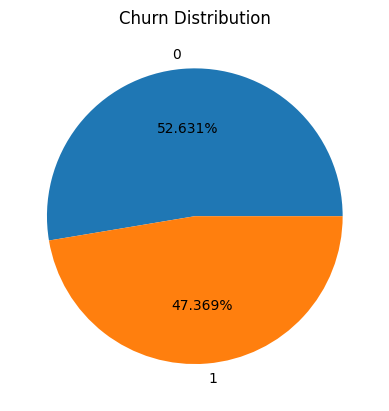

In [21]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.3f%%')
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

In [22]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [23]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

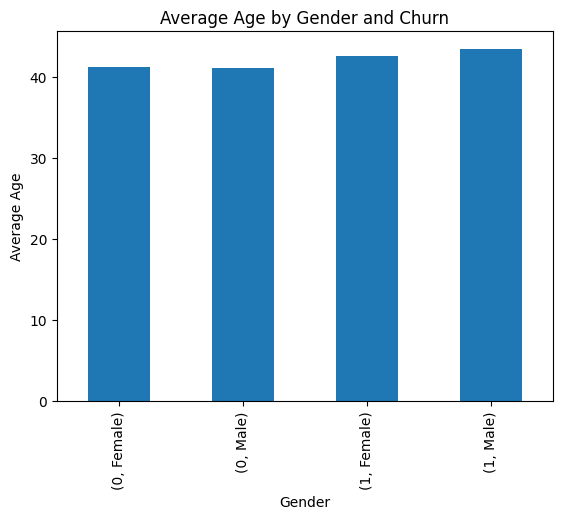

In [24]:
df.groupby(['Churn','Gender'])['Age'].mean().plot(kind='bar')
plt.title('Average Age by Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

<Axes: xlabel='Churn'>

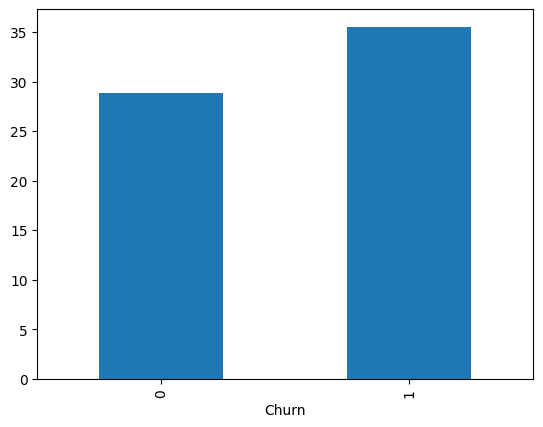

In [25]:
df.groupby('Churn')['Tenure'].mean().plot(kind= 'bar')

In [26]:
df.head(2)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0


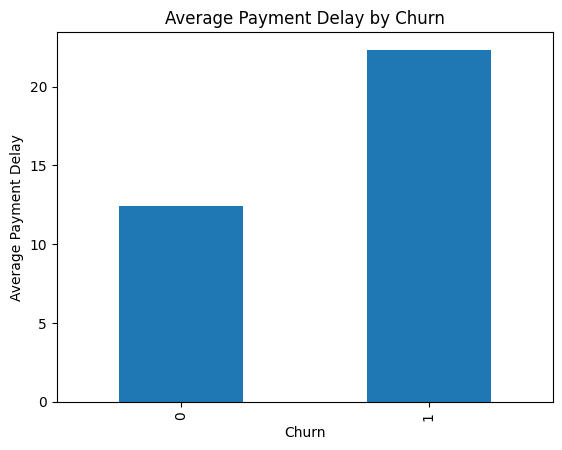

In [27]:
df.groupby('Churn')['Payment Delay'].mean().plot(kind='bar')
plt.title('Average Payment Delay by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Payment Delay')
plt.show()

In [28]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [29]:
df.head(1)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1


In [30]:
y = df[['Churn']]
x = df[['Age', 'Gender', 'Tenure', 'Payment Delay', 'Subscription Type', 'Contract Length']]

In [31]:
y

,Churn
0,1
1,0
2,0
3,0
4,0
...,...
64369,1
64370,1
64371,1
64372,1


In [32]:
x

,Age,Gender,Tenure,Payment Delay,Subscription Type,Contract Length
0,22,Female,25,27,Basic,Monthly
1,41,Female,28,13,Standard,Monthly
2,47,Male,27,29,Premium,Annual
3,35,Male,9,17,Premium,Quarterly
4,53,Female,58,2,Standard,Annual
...,...,...,...,...,...,...
64369,45,Female,33,21,Basic,Quarterly
64370,37,Male,6,22,Standard,Annual
64371,25,Male,39,30,Premium,Monthly
64372,50,Female,18,22,Standard,Monthly


In [33]:
#change the categorical values in to numerical values
x['Gender'] = x['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

/tmp/ipython-input-4147995316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender'] = x['Gender'].apply(lambda x: 1 if x == 'Male' else 0)


In [34]:
x['Subscription Type'] = x['Subscription Type'].apply(lambda x: 1 if x == 'Basic' else (2 if x == 'Premium' else 0))

/tmp/ipython-input-12454137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Subscription Type'] = x['Subscription Type'].apply(lambda x: 1 if x == 'Basic' else (2 if x == 'Premium' else 0))


In [35]:
x['Contract Length'] = x['Contract Length'].apply(lambda x: 1 if x == 'Monthly' else (2 if x == 'Yearly' else 0))

/tmp/ipython-input-3384626971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Contract Length'] = x['Contract Length'].apply(lambda x: 1 if x == 'Monthly' else (2 if x == 'Yearly' else 0))


In [36]:
x

,Age,Gender,Tenure,Payment Delay,Subscription Type,Contract Length
0,22,0,25,27,1,1
1,41,0,28,13,0,1
2,47,1,27,29,2,0
3,35,1,9,17,2,0
4,53,0,58,2,0,0
...,...,...,...,...,...,...
64369,45,0,33,21,1,0
64370,37,1,6,22,0,0
64371,25,1,39,30,2,1
64372,50,0,18,22,0,1


In [37]:
y

,Churn
0,1
1,0
2,0
3,0
4,0
...,...
64369,1
64370,1
64371,1
64372,1


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
x_test

array([[-0.78765054, -0.93155819, -1.57440081,  0.89211973, -0.00178567,
         1.38275661],
       [-1.14734343,  1.07347024,  0.64370531, -0.80120037,  1.22434881,
         1.38275661],
       [ 1.4424454 , -0.93155819,  0.81881895, -0.01098433, -1.22792014,
         1.38275661],
       ...,
       [-1.43509774, -0.93155819, -1.74951445,  0.77923172, -1.22792014,
        -0.72319307],
       [-0.85958911, -0.93155819,  0.41022045,  0.66634371, -0.00178567,
         1.38275661],
       [ 1.37050682,  1.07347024, -1.5160296 ,  1.45655976,  1.22434881,
        -0.72319307]])

In [41]:
x_train

array([[ 1.29856824e+00,  1.07347024e+00, -1.69114324e+00,
         2.14791687e-01, -1.78566741e-03, -7.23193073e-01],
       [ 7.94998191e-01, -9.31558193e-01,  4.10220454e-01,
         5.53455706e-01,  1.22434881e+00, -7.23193073e-01],
       [ 2.19489563e-01, -9.31558193e-01,  1.34415987e+00,
         1.11789574e+00, -1.78566741e-03, -7.23193073e-01],
       ...,
       [ 2.19489563e-01,  1.07347024e+00, -1.15120470e-01,
        -1.23872332e-01,  1.22434881e+00, -7.23193073e-01],
       [ 5.07243877e-01,  1.07347024e+00, -2.31862897e-01,
        -1.81719243e+00, -1.22792014e+00, -7.23193073e-01],
       [-1.65091348e+00,  1.07347024e+00,  1.18364385e-01,
         1.11789574e+00, -1.22792014e+00, -7.23193073e-01]])

In [42]:
from sklearn.metrics import accuracy_score
def modelPerformance(pedictions):
    print("Accuracy Score: ", accuracy_score(y_test, predictions))

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
from  sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
predictions = log_model.predict(x_test)
modelPerformance(predictions)

Accuracy Score:  0.7901359223300971


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
x

,Age,Gender,Tenure,Payment Delay,Subscription Type,Contract Length
0,22,0,25,27,1,1
1,41,0,28,13,0,1
2,47,1,27,29,2,0
3,35,1,9,17,2,0
4,53,0,58,2,0,0
...,...,...,...,...,...,...
64369,45,0,33,21,1,0
64370,37,1,6,22,0,0
64371,25,1,39,30,2,1
64372,50,0,18,22,0,1


In [46]:
y_pre = log_model.predict([[50, 0, 30, 20, 2, 1]])[0]
modelPerformance(y_pre)

Accuracy Score:  0.7901359223300971


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
predictions = dt_model.predict(x_test)
modelPerformance(predictions)

Accuracy Score:  0.7727378640776699


In [48]:
from sklearn.neighbors import KNeighborsClassifier
para_gid = {"n_neighbors": [3,5,7,9], "weights": ["uniform", "distance"]}
grdkn = GridSearchCV(KNeighborsClassifier(), para_gid, cv=5)
grdkn.fit(x_train, y_train)
grdkn.best_params_
predictions = grdkn.predict(x_test)
modelPerformance(predictions)


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Accuracy Score:  0.8340970873786407


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
predictions = rf_model.predict(x_test)
modelPerformance(predictions)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy Score:  0.8330873786407768


In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
para_grid = {"C": [0.1, 1, 10, 100], "kernel": ["linear", "rbf", "poly"]}
grd_svm = GridSearchCV(SVC(), para_grid, cv=5)
grd_svm.fit(x_train, y_train)
grd_svm.best_params_
predictions = grd_svm.predict(x_test)
modelPerformance(predictions)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
best_model = grd_svm.best_estimator_